## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data["Tumor Volume (mm3)"].max()

78.56701362

In [2]:
# Checking the number of mice.
mouse_count = data["Mouse ID"].count()
print(f"The number of unique mice in the study was: {mouse_count}")


The number of unique mice in the study was: 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated= data[data.duplicated(subset= ['Mouse ID','Timepoint'])]
duplicated= pd.DataFrame(duplicated["Mouse ID"])
duplicated

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated = data[data.duplicated(subset= ['Mouse ID','Timepoint'])]
all_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.drop_duplicates(subset= ['Mouse ID','Timepoint'])

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = data["Mouse ID"].count()
print(f"When the duplicates are removed the mouse count is: {mouse_count}")

When the duplicates are removed the mouse count is: 1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen = data[['Drug Regimen','Tumor Volume (mm3)']]
drug_df = drug_regimen.groupby(["Drug Regimen"])

#Calculate
drug_mean = round(drug_df.mean(),2)
drug_median = round(drug_df.median(),2)
drug_var =round(drug_df.var(),2)
drug_std = round(drug_df.std(),2)
drug_sem = round(drug_df.sem(),2)

# Assemble the resulting series into a single summary dataframe.
mean_median = pd.merge(drug_mean,drug_median,on="Drug Regimen")
var_std =pd.merge(drug_var,drug_std,on="Drug Regimen")
mm_vs = pd.merge(mean_median,var_std,on="Drug Regimen")
drug_summary = pd.merge(mm_vs, drug_sem,on="Drug Regimen")
drug_summary = drug_summary.rename(columns={"Tumor Volume (mm3)_x_x": "Mean",
                                  "Tumor Volume (mm3)_y_x": "Median",
                                  "Tumor Volume (mm3)_x_y": "Variance",
                                  "Tumor Volume (mm3)_y_y": "Standard Deviation",
                                  "Tumor Volume (mm3)": "SEM"})
drug_summary



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = drug_df.agg(['mean','median','var','std','sem'])
round(agg_summary,2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

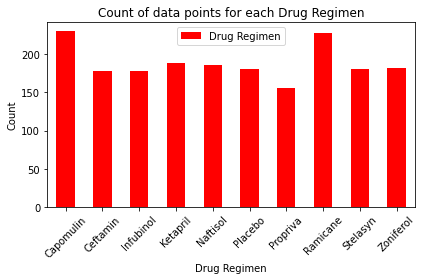

In [65]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="red", rot= 45)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()

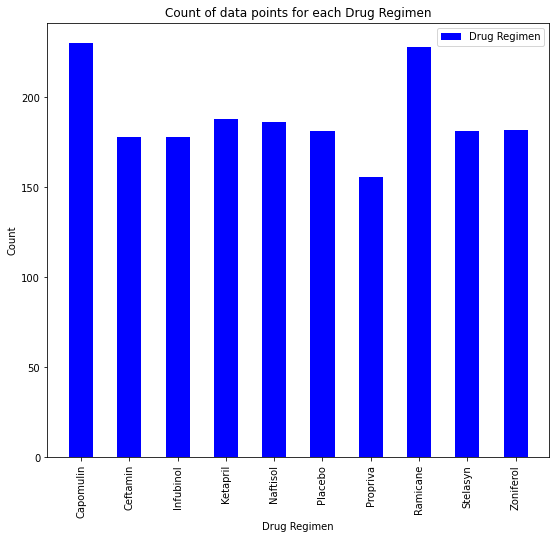

In [71]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.show()

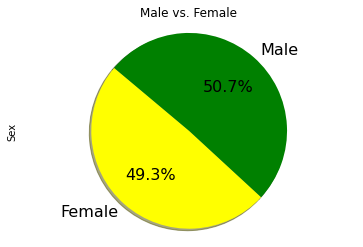

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First create a dataframe grouping by the 'Sex' column
gender_group = data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

gender_group_count.plot(kind='pie', y='Sex', title="Male vs. Female",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["yellow","green"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.show()

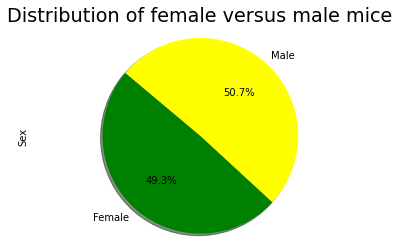

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["green", "yellow"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = data[["Mouse ID", "Timepoint"]].groupby(["Mouse ID"])
max_timepoint = max_timepoint.max("Timepoint")
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint = pd.merge(max_timepoint,data, on = "Timepoint")
four_drugs = max_timepoint[max_timepoint['Drug Regimen'].isin(drug_list)]
four_drugs.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [109]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volume = data[["Mouse ID", "Tumor Volume (mm3)"]]

    
quartiles = data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {round(lowerq,4)}")
print(f"The upper quartile of Tumor Volume (mm3) is: {round(upperq,4)}")
print(f"The interquartile range of Tumor Volume (mm3) is: {round(iqr,4)}")
print(f"The the median of Tumor Volume (mm3) is: {round(quartiles[0.5],4)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,4)} could be outliers.")
print(f"Values above {round(upper_bound,4)} could be outliers.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    

The lower quartile of Tumor Volume (mm3) is: 45.0
The upper quartile of Tumor Volume (mm3) is: 56.2922
The interquartile range of Tumor Volume (mm3) is: 11.2922
The the median of Tumor Volume (mm3) is: 48.9515 
Values below 28.0617 could be outliers.
Values above 73.2305 could be outliers.


In [112]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = four_drugs['Tumor Volume (mm3)'].loc[four_drugs['Drug Regimen'] == drug]
# add subset 
    tumor_vol.append(tumor_vol_by_drug)

# Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {round(iqr,4)}.')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {round(lower_bound,4)} could be outliers.')
    print(f'For {drug}, values above {round(upper_bound,4)} could be outliers.\n')

For Capomulin, Interquartile Range (IQR) is 7.763.
For Capomulin, values below 23.8182 could be outliers.
For Capomulin, values above 54.8701 could be outliers.

For Ramicane, Interquartile Range (IQR) is 9.4851.
For Ramicane, values below 19.3347 could be outliers.
For Ramicane, values above 57.2753 could be outliers.

For Infubinol, Interquartile Range (IQR) is 14.7532.
For Infubinol, values below 27.2558 could be outliers.
For Infubinol, values above 86.2685 could be outliers.

For Ceftamin, Interquartile Range (IQR) is 14.0627.
For Ceftamin, values below 28.3129 could be outliers.
For Ceftamin, values above 84.5636 could be outliers.



ValueError: Dimensions of labels and X must be compatible

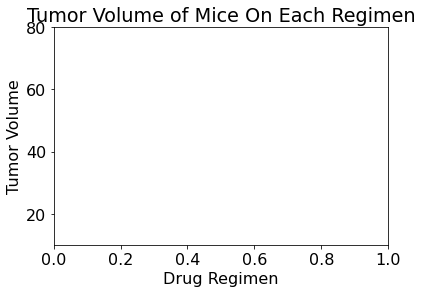

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()

# Set title, labels, limits
ax1.set_title('Tumor Volume of Mice On Each Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')

ax1.set_ylim(10, 80)
ax1.boxplot(tumor_vol,labels=drug_list, flierprops=green_diamond)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

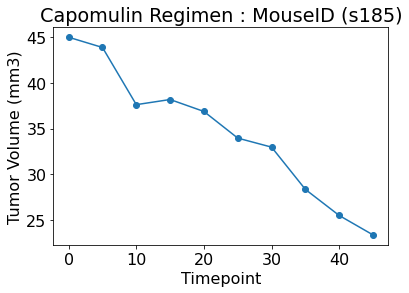

In [115]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# isolate a mouse treated with Capomulin
a_mouse = data[['Timepoint', 'Tumor Volume (mm3)']].loc[(data['Drug Regimen'] == 'Capomulin') & (data['Mouse ID']=='s185')]
a_mouse
plt.plot(a_mouse['Timepoint'], a_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen : MouseID (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0, 0.5, 'Avg Tumor Vol (mm3)')

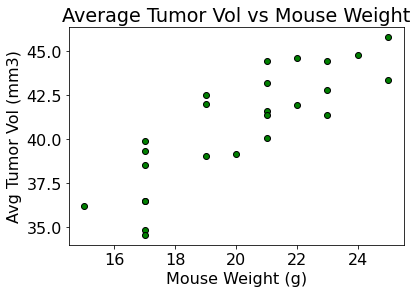

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol_weight = data[(data["Drug Regimen"] == "Capomulin")]
vol_weight = vol_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
each_weight = vol_weight.groupby(["Mouse ID", "Weight (g)"])

avg_vol_df = each_weight["Tumor Volume (mm3)"].mean().to_frame()
avg_vol_df = avg_vol_df.reset_index()
#avg_vol_df.head()

plt.scatter(avg_vol_df["Weight (g)"],
            avg_vol_df["Tumor Volume (mm3)"],
            marker = 'o',
            facecolors='green',
            edgecolors='black')

plt.title('Average Tumor Vol vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')

## Correlation and Regression

The linear regression equation is y = 0.95x + 21.55


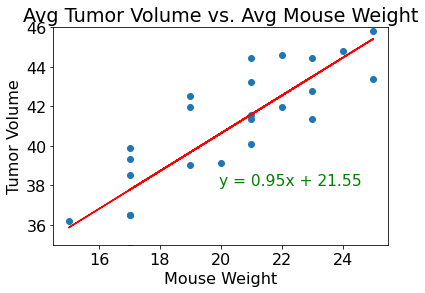

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_vol_df['Weight (g)']
y_values = avg_vol_df['Tumor Volume (mm3)']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

# plot line with scatter
plt.scatter(x_values, y_values)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

# calculate regression values
reg_values = x_values * slope + intercept
plt.plot(x_values, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15.5,color="green")
plt.show()